In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Import dataset 

In [2]:
train = pd.read_csv('../train.csv')
y = train.label
train = train.drop(columns='label')

In [3]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(train.values)

In [37]:
pca = PCA(n_components=4)
pca_com = pca.fit_transform(X_std)

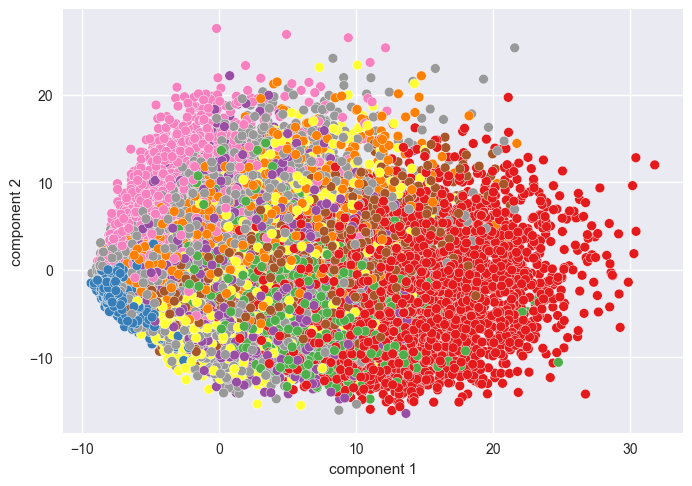

In [51]:
plt.style.use('seaborn')
plt.scatter(pca_com[:,0], pca_com[:,1],
            c=y, edgecolors='white',
            cmap='Set1')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

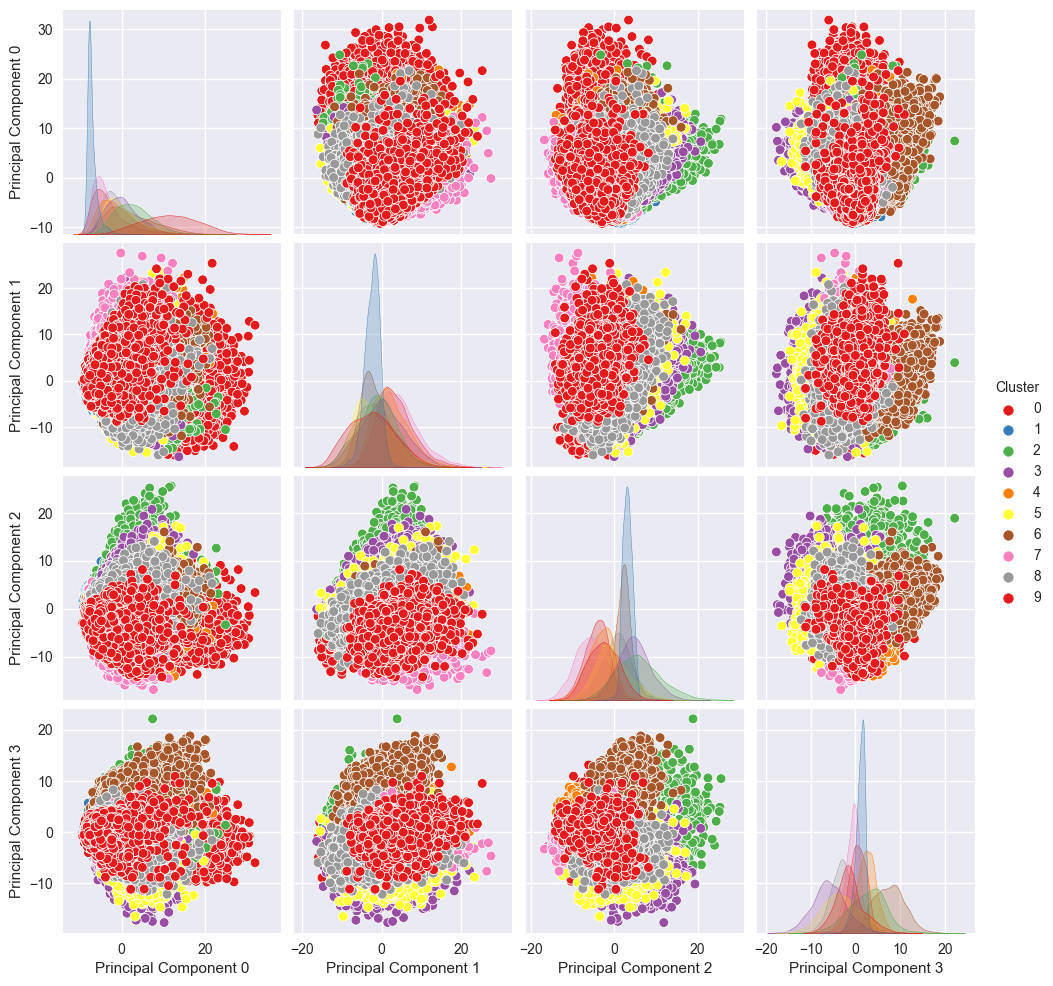

In [59]:
pairplot_df = pd.DataFrame(pca_com, columns=['Principal Component '+str(j) for j in range(pca_com.shape[1])])
pairplot_df.reindex(pairplot_df.columns.sort_values(ascending=True))
pairplot_df['Cluster'] = y
pairplot_df = pairplot_df.sort_values('Cluster',ascending=True)
sns.pairplot(pairplot_df, hue='Cluster', vars=pairplot_df.drop(columns='Cluster').columns, palette='Set1')
plt.show()

In [52]:
lda = LinearDiscriminantAnalysis(n_components=4)
lda_com = lda.fit_transform(X_std, y)

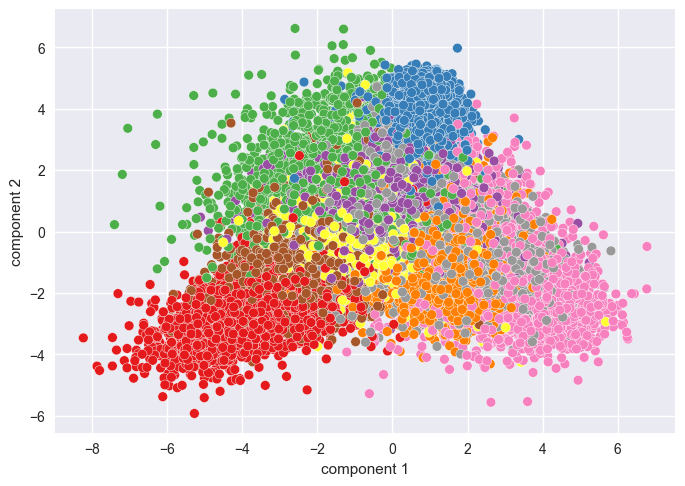

In [56]:
plt.scatter(lda_com[:,0], lda_com[:,1],
            c=y, edgecolors='white',
            cmap='Set1')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

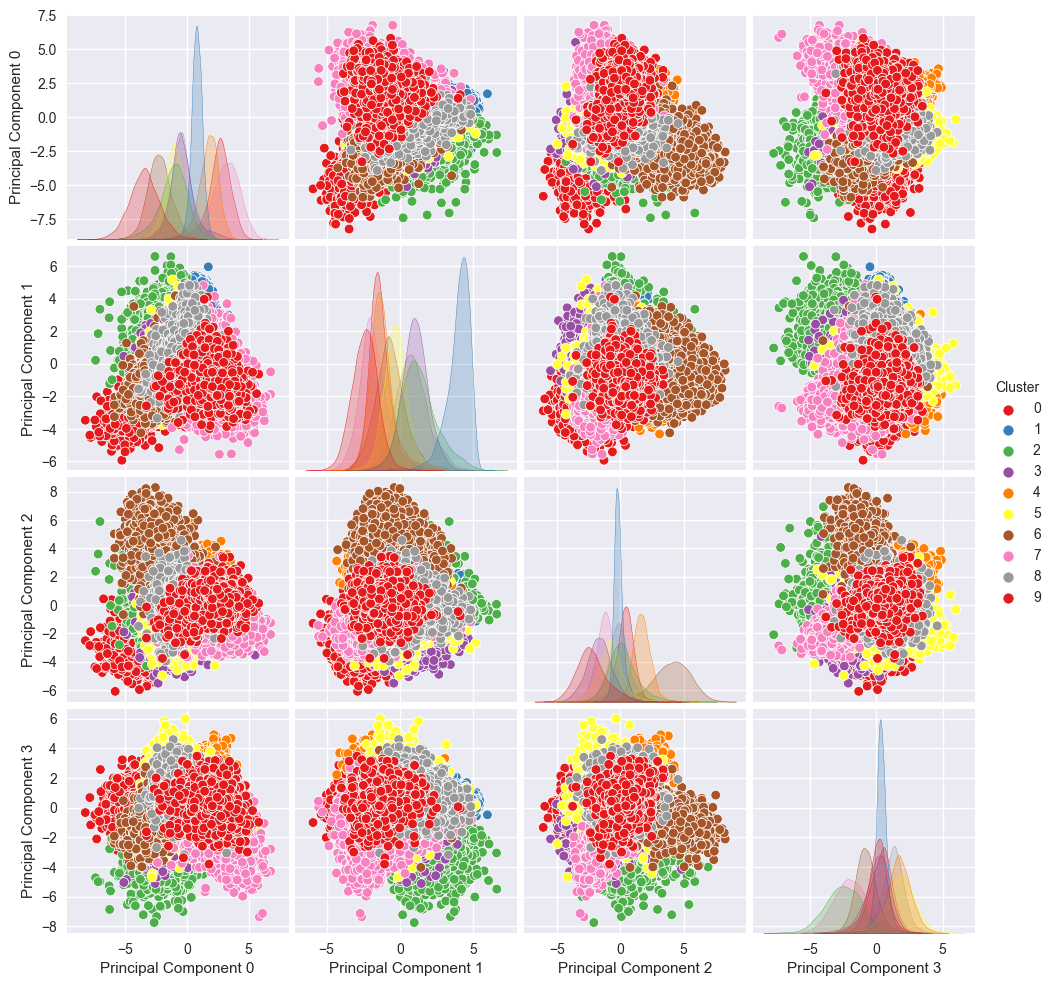

In [58]:
pairplot_df = pd.DataFrame(lda_com, columns=['Principal Component '+str(j) for j in range(pca_com.shape[1])])
pairplot_df.reindex(pairplot_df.columns.sort_values(ascending=True))
pairplot_df['Cluster'] = y
pairplot_df = pairplot_df.sort_values('Cluster',ascending=True)
sns.pairplot(pairplot_df, hue='Cluster', vars=pairplot_df.drop(columns='Cluster').columns, palette='Set1')
plt.show()

In [71]:
def pca_mse(n):
    # Make PCA
    pca = PCA(n_components=n, whiten=True)
    pca.fit(X_std)
    X_red = pca.transform(X_std)

    # MSE associated with back-projection:
    X_orig = X_std
    X_hat = pca.inverse_transform( pca.transform(X_orig) )
    mse = ((X_hat - X_orig)**2).mean(axis=None)
    
    return mse

In [76]:
mses = []
N = 401
for i in range(20,N,20):
    m = pca_mse(i)
    print ("%d-component PCA: MSE = %0.4g"%(i,m))
    mses.append((i,m))
mses = np.array(mses)

20-component PCA: MSE = 0.554
40-component PCA: MSE = 0.4392
60-component PCA: MSE = 0.3634
80-component PCA: MSE = 0.3075
100-component PCA: MSE = 0.2597
120-component PCA: MSE = 0.2204
140-component PCA: MSE = 0.1882
160-component PCA: MSE = 0.1605
180-component PCA: MSE = 0.136
200-component PCA: MSE = 0.1149
220-component PCA: MSE = 0.09747
240-component PCA: MSE = 0.08288
260-component PCA: MSE = 0.07092
280-component PCA: MSE = 0.06092
300-component PCA: MSE = 0.05254
320-component PCA: MSE = 0.04545
340-component PCA: MSE = 0.03942
360-component PCA: MSE = 0.03424
380-component PCA: MSE = 0.02978
400-component PCA: MSE = 0.02585


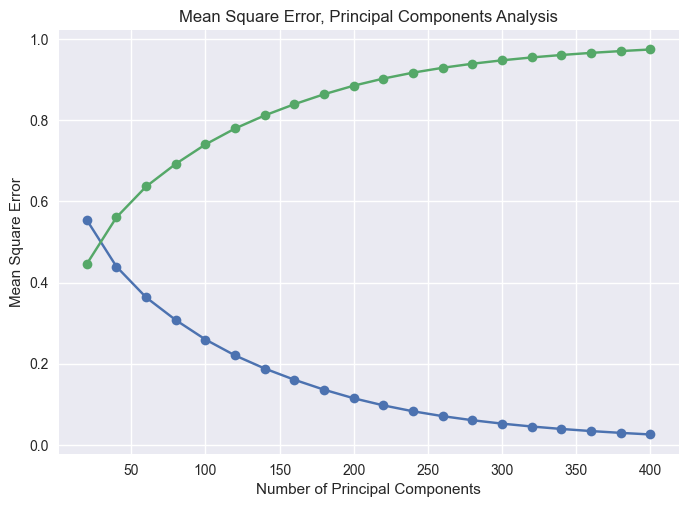

In [77]:
plt.plot(mses[:,0],mses[:,1],'-o',label='MSE')
plt.plot(mses[:,0],1.0-mses[:,1],'-o',label='Rsq')

plt.title('Mean Square Error, Principal Components Analysis')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Square Error')

plt.show()

In [25]:
tsne = TSNE(n_components=2)
tsne_com = tsne.fit_transform(X_std)

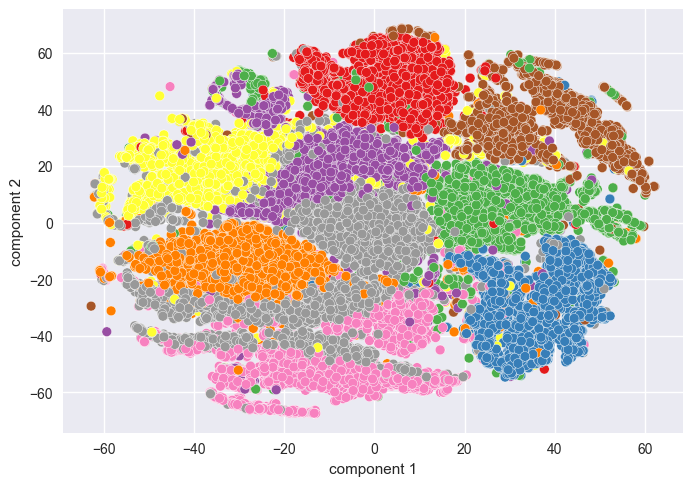

In [57]:
plt.scatter(tsne_com[:,0], tsne_com[:,1],
            c=y, edgecolor='white',
            cmap='Set1')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

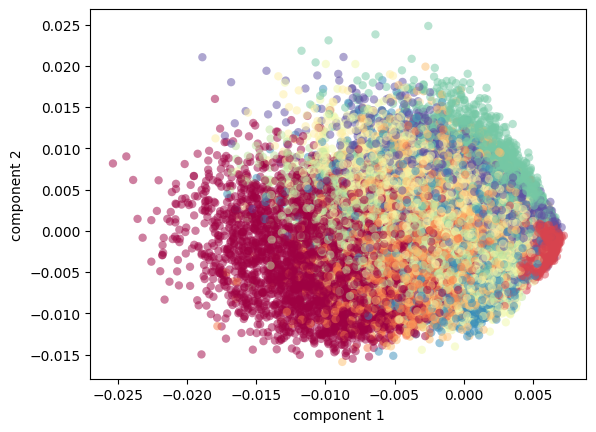

In [28]:
ica = FastICA(n_components=2)
ica_com = ica.fit_transform(X_std)
plt.scatter(ica_com[:,0], ica_com[:,1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()